# 1. Introduction

## 1.1 Business Description

## 1.2 Problem Statement

## 1.3 Objective of the Project

## 1.4 Approach

# 2. Data Understanding and Data Preparation

## 2.1 Importing Libraries and Packages

In [1]:
# Importing used Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

# Update the notebook display settings to show all the data without minimizing
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

## 2.2 Data Loading and Inspection

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
print(train_data.shape)
train_data.head()

(69999, 172)


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
train_data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

## 2.3 Data Cleaning and Preparation

In [5]:
# Checking for the number of rows having all missing values
print('Number of empty Rows: {}'.format(train_data.isnull().all(axis=1).sum()))

# Checking for the number of columns having all missing values
print('Number of empty Columns: {}'.format(train_data.isnull().all(axis=0).sum()))

Number of empty Rows: 0
Number of empty Columns: 0


In [6]:
# Checking for Unique Values
n_unique = train_data.nunique()
single_value = n_unique[n_unique.values == 1].index
single_value

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'], dtype='object')

In [7]:
# dropping all the columns having single values
train_data = train_data.drop(single_value, axis =1)
test_data = test_data.drop(single_value, axis =1)

In [8]:
train_data.shape

(69999, 159)

In [9]:
train_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 159 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    arpu_6                    float64
 2    arpu_7                    float64
 3    arpu_8                    float64
 4    onnet_mou_6               float64
 5    onnet_mou_7               float64
 6    onnet_mou_8               float64
 7    offnet_mou_6              float64
 8    offnet_mou_7              float64
 9    offnet_mou_8              float64
 10   roam_ic_mou_6             float64
 11   roam_ic_mou_7             float64
 12   roam_ic_mou_8             float64
 13   roam_og_mou_6             float64
 14   roam_og_mou_7             float64
 15   roam_og_mou_8             float64
 16   loc_og_t2t_mou_6          float64
 17   loc_og_t2t_mou_7          float64
 18   loc_og_t2t_mou_8          float64
 19   loc_og_t2m_mou_6          float64
 20   loc_

In [10]:
# Calculating the percentage of null values in each column
null_col = 100*train_data.isnull().sum()/len(train_data)
# Checking the columns that have more than 50% null values
null_col[null_col>50]

date_of_last_rech_data_6    74.902499
date_of_last_rech_data_7    74.478207
date_of_last_rech_data_8    73.689624
total_rech_data_6           74.902499
total_rech_data_7           74.478207
total_rech_data_8           73.689624
max_rech_data_6             74.902499
max_rech_data_7             74.478207
max_rech_data_8             73.689624
count_rech_2g_6             74.902499
count_rech_2g_7             74.478207
count_rech_2g_8             73.689624
count_rech_3g_6             74.902499
count_rech_3g_7             74.478207
count_rech_3g_8             73.689624
av_rech_amt_data_6          74.902499
av_rech_amt_data_7          74.478207
av_rech_amt_data_8          73.689624
arpu_3g_6                   74.902499
arpu_3g_7                   74.478207
arpu_3g_8                   73.689624
arpu_2g_6                   74.902499
arpu_2g_7                   74.478207
arpu_2g_8                   73.689624
night_pck_user_6            74.902499
night_pck_user_7            74.478207
night_pck_us

In [11]:
# Dropping the columns that have more than 70% null values
cols_to_drop = null_col[null_col > 70].index
train_data.drop(columns=cols_to_drop, inplace=True)
test_data.drop(columns=cols_to_drop, inplace=True)

In [12]:
dominance_threshold = 0.90

# Find columns with low variation
low_variation_columns = [
    col for col in train_data.columns 
    if (train_data[col].value_counts(normalize=True).max() > dominance_threshold)
]

# Output the columns with low variation
print("Columns with low variation (90%+ dominated by a single value):")
print(low_variation_columns)

Columns with low variation (90%+ dominated by a single value):
['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'og_others_7', 'og_others_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']


In [13]:
# Dropping all low-variation columns since they are not strong contributors
train_data.drop(low_variation_columns, axis=1, inplace=True)
test_data.drop(low_variation_columns, axis=1, inplace=True)

In [14]:
#TODO: Check and remove unused variables
date_cols = train_data.select_dtypes('object').columns
arpu_cols = train_data.columns[train_data.columns.str.contains('arpu', case=False)]
total_cols = train_data.columns[train_data.columns.str.contains('total', case=False)]
cat_cols = train_data.columns[train_data.columns.str.contains('fb_|max_|night_pck', case=False, regex=True)]
count_cols = train_data.columns[train_data.columns.str.contains('count_|monthly|sachet', case=False, regex=True)]
roam_cols = train_data.columns[train_data.columns.str.contains('roam', case=False, regex=True)]

In [15]:
# Convert recharge date columns to datetime format
train_data['date_of_last_rech_6'] = pd.to_datetime(train_data['date_of_last_rech_6'], errors='coerce')
train_data['date_of_last_rech_7'] = pd.to_datetime(train_data['date_of_last_rech_7'], errors='coerce')
train_data['date_of_last_rech_8'] = pd.to_datetime(train_data['date_of_last_rech_8'], errors='coerce')

# Calculate recharge frequency, replacing missing values with a placeholder
train_data['freq_good_phase'] = (train_data['date_of_last_rech_7'] - train_data['date_of_last_rech_6']).dt.days
train_data['freq_impact_phase'] = (train_data['date_of_last_rech_8'] - train_data['date_of_last_rech_7']).dt.days

In [16]:
# Convert recharge date columns to datetime format
test_data['date_of_last_rech_6'] = pd.to_datetime(test_data['date_of_last_rech_6'], errors='coerce')
test_data['date_of_last_rech_7'] = pd.to_datetime(test_data['date_of_last_rech_7'], errors='coerce')
test_data['date_of_last_rech_8'] = pd.to_datetime(test_data['date_of_last_rech_8'], errors='coerce')

# Calculate recharge frequency, replacing missing values with a placeholder
test_data['freq_good_phase'] = (test_data['date_of_last_rech_7'] - test_data['date_of_last_rech_6']).dt.days
test_data['freq_impact_phase'] = (test_data['date_of_last_rech_8'] - test_data['date_of_last_rech_7']).dt.days

In [17]:
train_data.drop(date_cols, axis=1, inplace=True)
test_data.drop(date_cols, axis=1, inplace=True)

In [18]:
train_data.drop('id', axis=1, inplace=True)
id = test_data.pop('id')

In [19]:
train_data.shape

(69999, 113)

## EDA

In [20]:
df = train_data.copy()

In [21]:
lower_limit = df.quantile(0.01)
upper_limit = df.quantile(0.99)

# Cap the values outside the 1st and 99th percentiles
df = df.apply(lambda x: x.clip(lower=lower_limit[x.name], upper=upper_limit[x.name]))

In [22]:
arpu_cols = df.columns[df.columns.str.contains('arpu', case=False)]
total_cols = df.columns[df.columns.str.contains('total', case=False)]
outgoing_col = df.columns[df.columns.str.contains('loc_og_|std_og_', case=False, regex=True)]
incoming_col = df.columns[df.columns.str.contains('loc_ic_|std_ic_', case=False, regex=True)]
count_cols = df.columns[df.columns.str.contains('count_|monthly|sachet', case=False, regex=True)]
roam_cols = df.columns[df.columns.str.contains('roam', case=False, regex=True)]

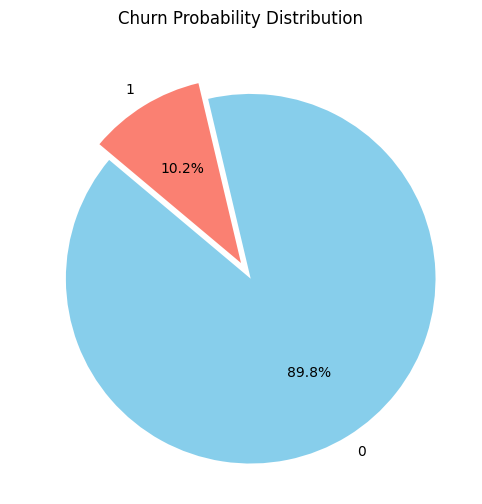

In [23]:
# Calculate the counts of each unique value in churn_probability
churn_counts = df['churn_probability'].value_counts()

if 0 in churn_counts.index:
    explode = [0.1 if value == 0 else 0 for value in churn_counts.index]  # Pop out the segment for 0
else:
    explode = [0] * len(churn_counts)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    churn_counts, 
    labels=churn_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode, 
    colors=['skyblue', 'salmon', 'lightgreen']
)
plt.title("Churn Probability Distribution")
plt.show()

In [24]:

def plot_combined_boxplot_with_hue(df, selected_columns, hue_col='churn_probability'):
    """
    Plots a single box plot for multiple columns with hue for differentiation.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - selected_columns (list of str): List of columns to plot.
    - hue_col (str): The column to use as hue for grouping in the box plot.
    """
    # Melt the DataFrame to have columns in a single 'variable' column
    melted_df = df.melt(id_vars=hue_col, value_vars=selected_columns, 
                        var_name="Columns", value_name="Values")
    # Plot
    plt.figure(figsize=(14, 8))
    if hue_col:
        sns.boxplot(data=melted_df, x="Columns", y="Values", hue=hue_col, palette="pastel", fliersize=3)
    else:
        sns.boxplot(data=melted_df, x="Columns", y="Values", palette="flare", fliersize=3)
    
    plt.xticks(rotation=45, ha='right')
    plt.title("Box Plot of Selected Columns by Churn Probability")
    plt.xlabel("Columns")
    plt.ylabel("Values")
    plt.legend(title=hue_col, loc='upper right')
    plt.show()

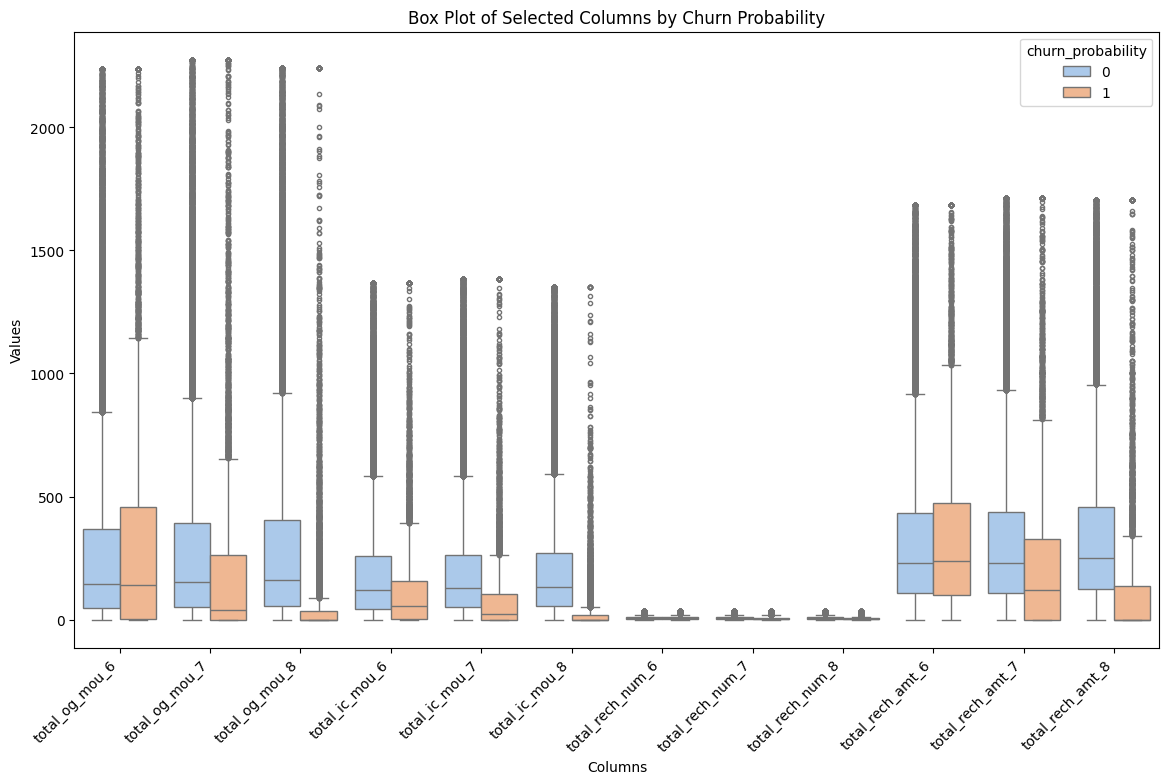

In [25]:
plot_combined_boxplot_with_hue(df, total_cols, hue_col='churn_probability')

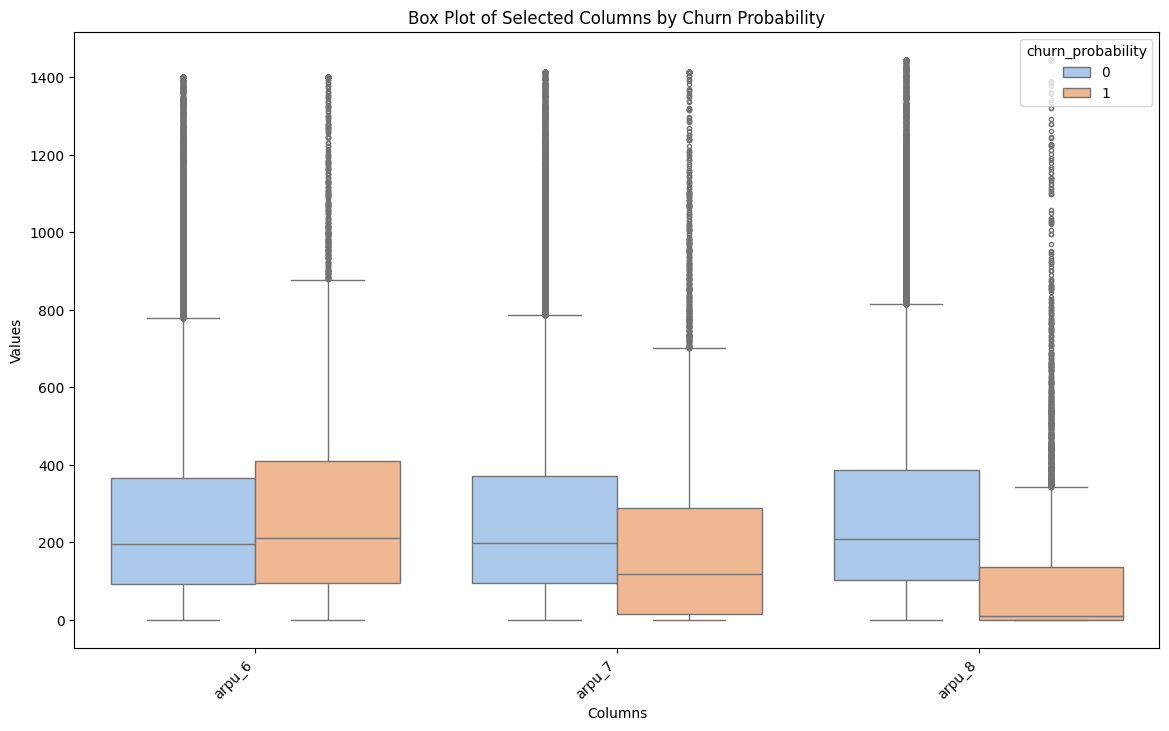

In [26]:
plot_combined_boxplot_with_hue(df, arpu_cols, hue_col='churn_probability')

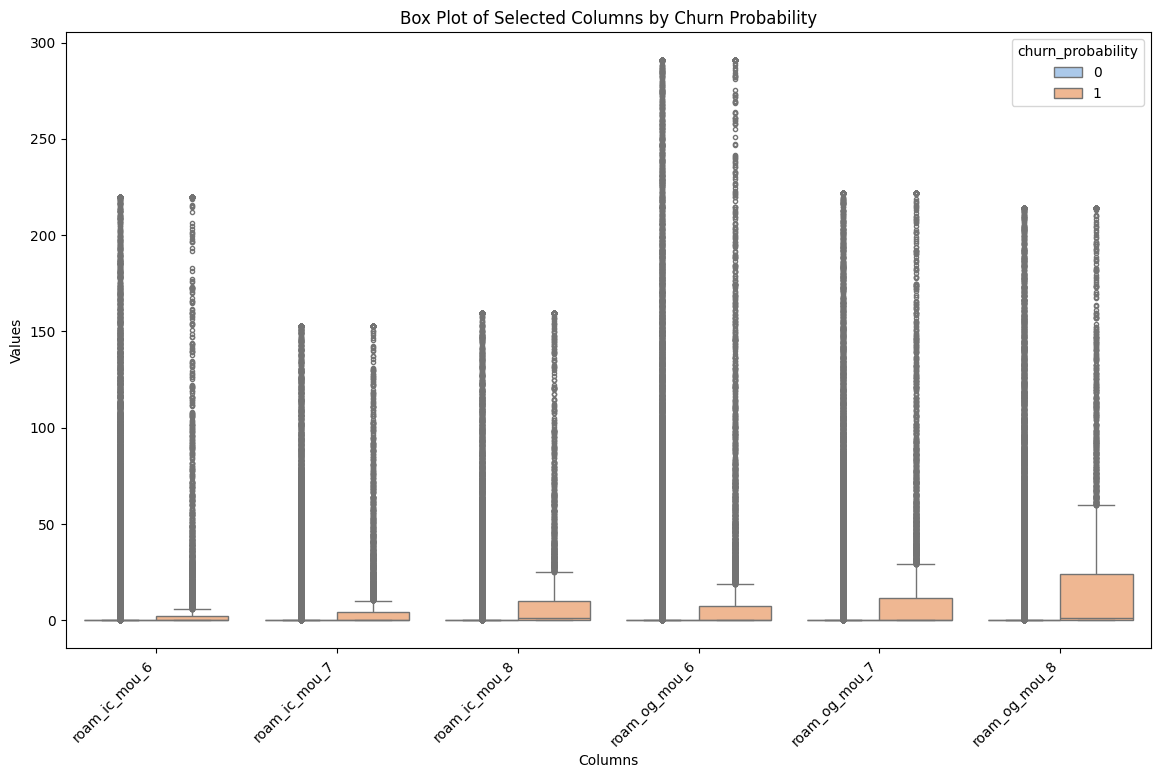

In [27]:
plot_combined_boxplot_with_hue(df, roam_cols, hue_col='churn_probability')

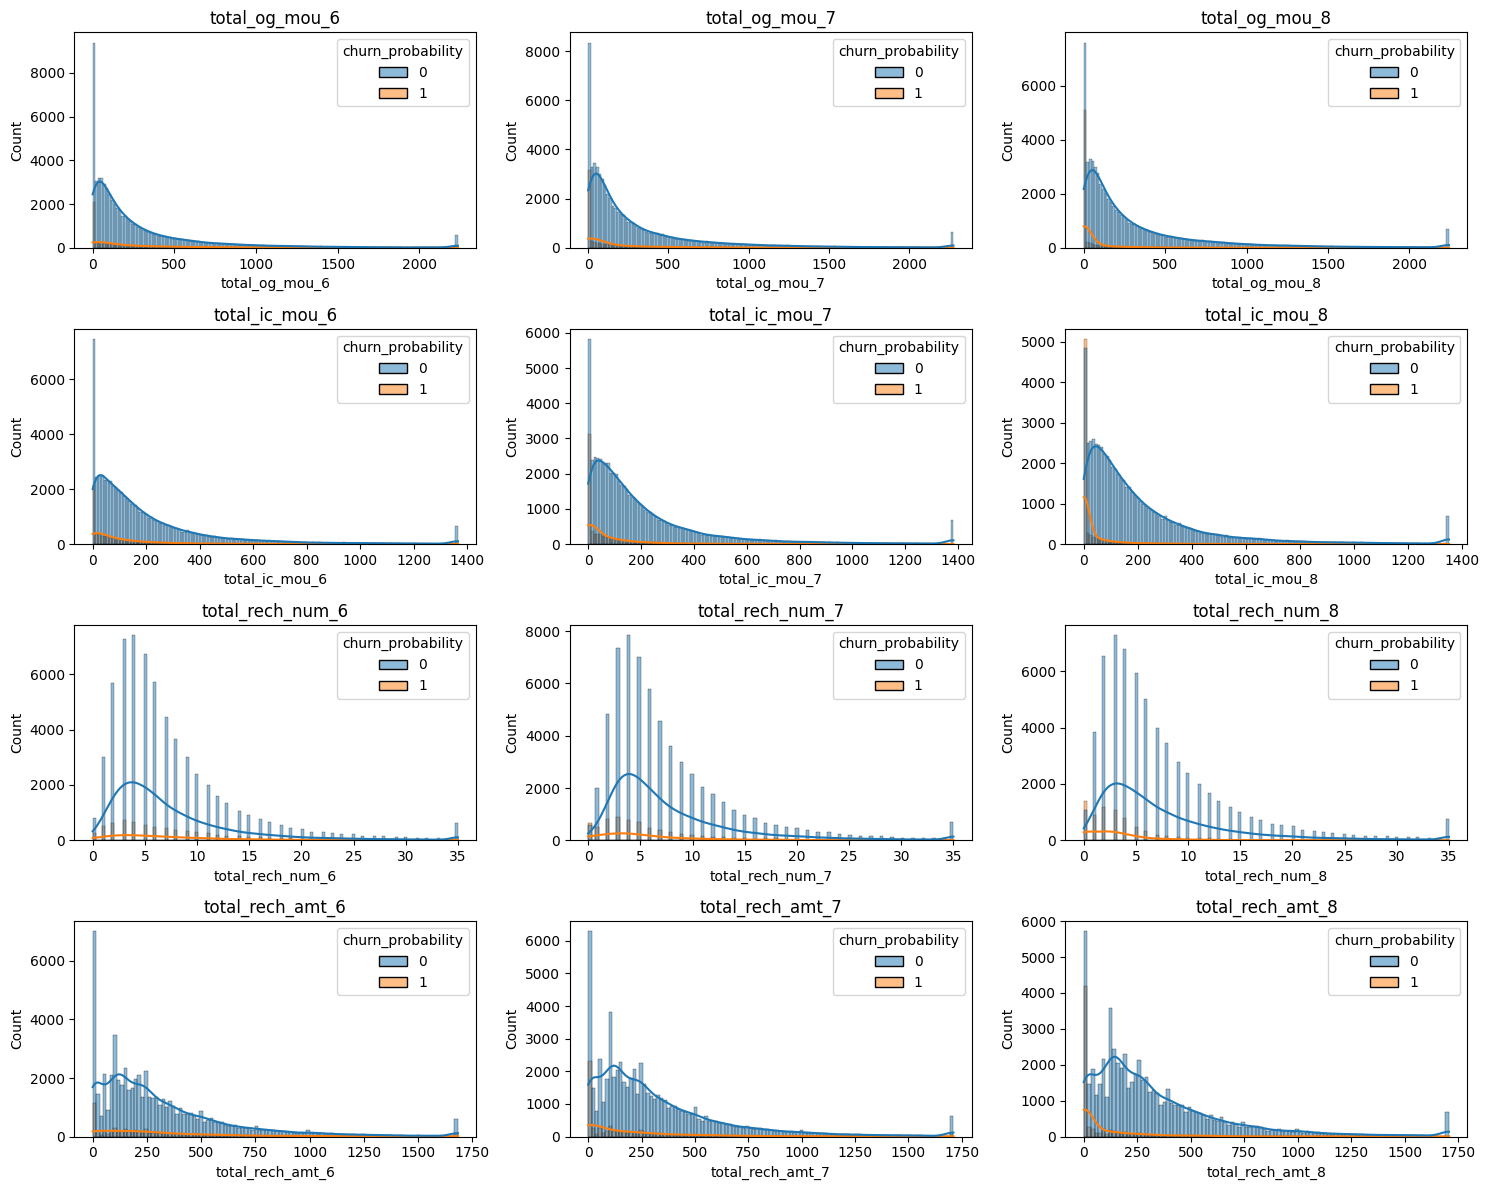

In [28]:
# Set up a grid of 4x3 subplots (for 12 columns)
fig, axes = plt.subplots(4, 3, figsize=(15, 12))  # 4 rows, 3 columns grid

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a histogram
for i, col in enumerate(total_cols):
    sns.histplot(df, x=col, ax=axes[i], kde=True, hue='churn_probability')  # kde=True adds a kernel density estimate
    axes[i].set_title(col)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Correlation

In [29]:
total_cols

Index(['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'], dtype='object')

In [30]:
corr_total_cols = df[['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 
                      'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7', 
                      'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'churn_probability']].corr()

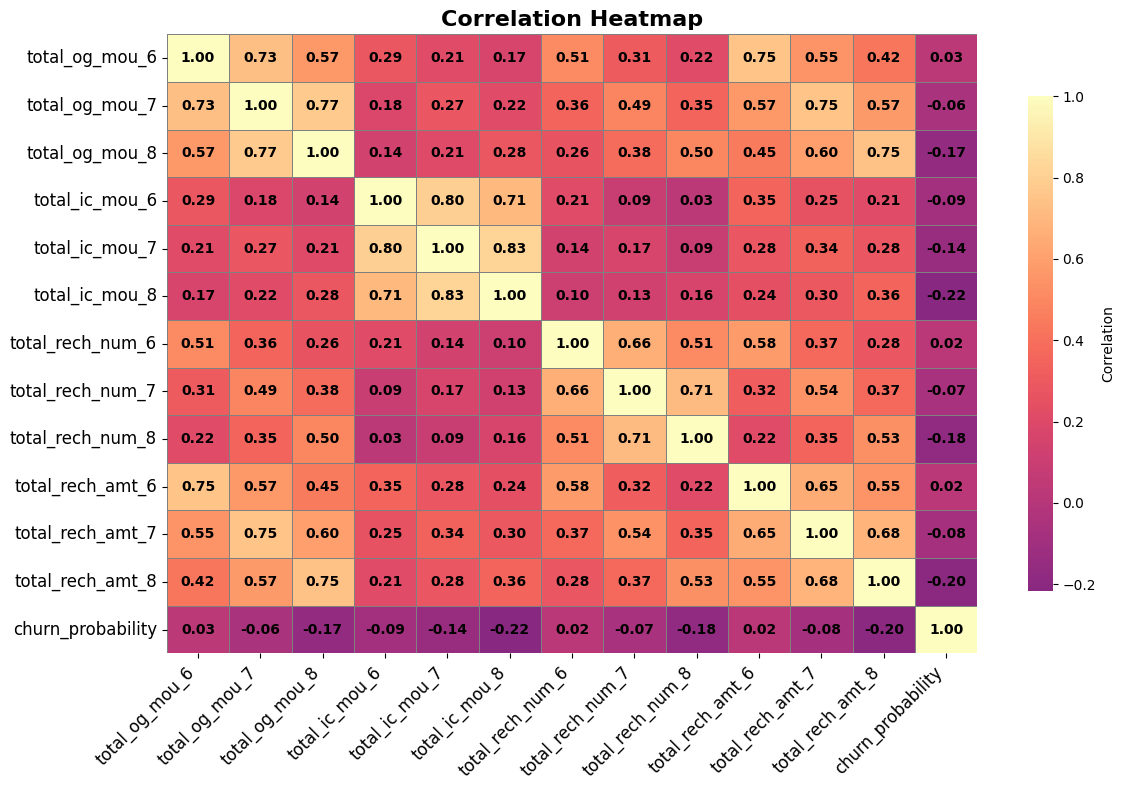

In [31]:
plt.figure(figsize=(12, 8))  # Set the figure size

# Create the heatmap
sns.heatmap(corr_total_cols, 
            annot=True,  # Annotate the cells with correlation values
            cmap='magma',  # Color palette: 'coolwarm' is a balanced palette
            center=0,  # Center the color palette at 0
            linewidths=0.5,  # Add slight separation between cells
            linecolor='gray',  # Gray line color
            cbar_kws={'shrink': 0.8, 'label': 'Correlation'},  # Colorbar label and shrinkage
            fmt='.2f',  # Format for annotation (2 decimal places)
            annot_kws={'size': 10, 'weight': 'bold', 'color': 'black'})  # Font style for annotations

# Improve readability
plt.title("Correlation Heatmap", fontsize=16, weight='bold')  # Add title
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better fit
plt.yticks(rotation=0, fontsize=12)  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()

In [32]:
outgoing_col

Index(['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8'], dtype='object')

In [33]:
corr_outgoing_col = df[['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 
                        'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 
                        'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 
                        'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 
                        'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 
                        'std_og_mou_8', 'churn_probability']].corr()

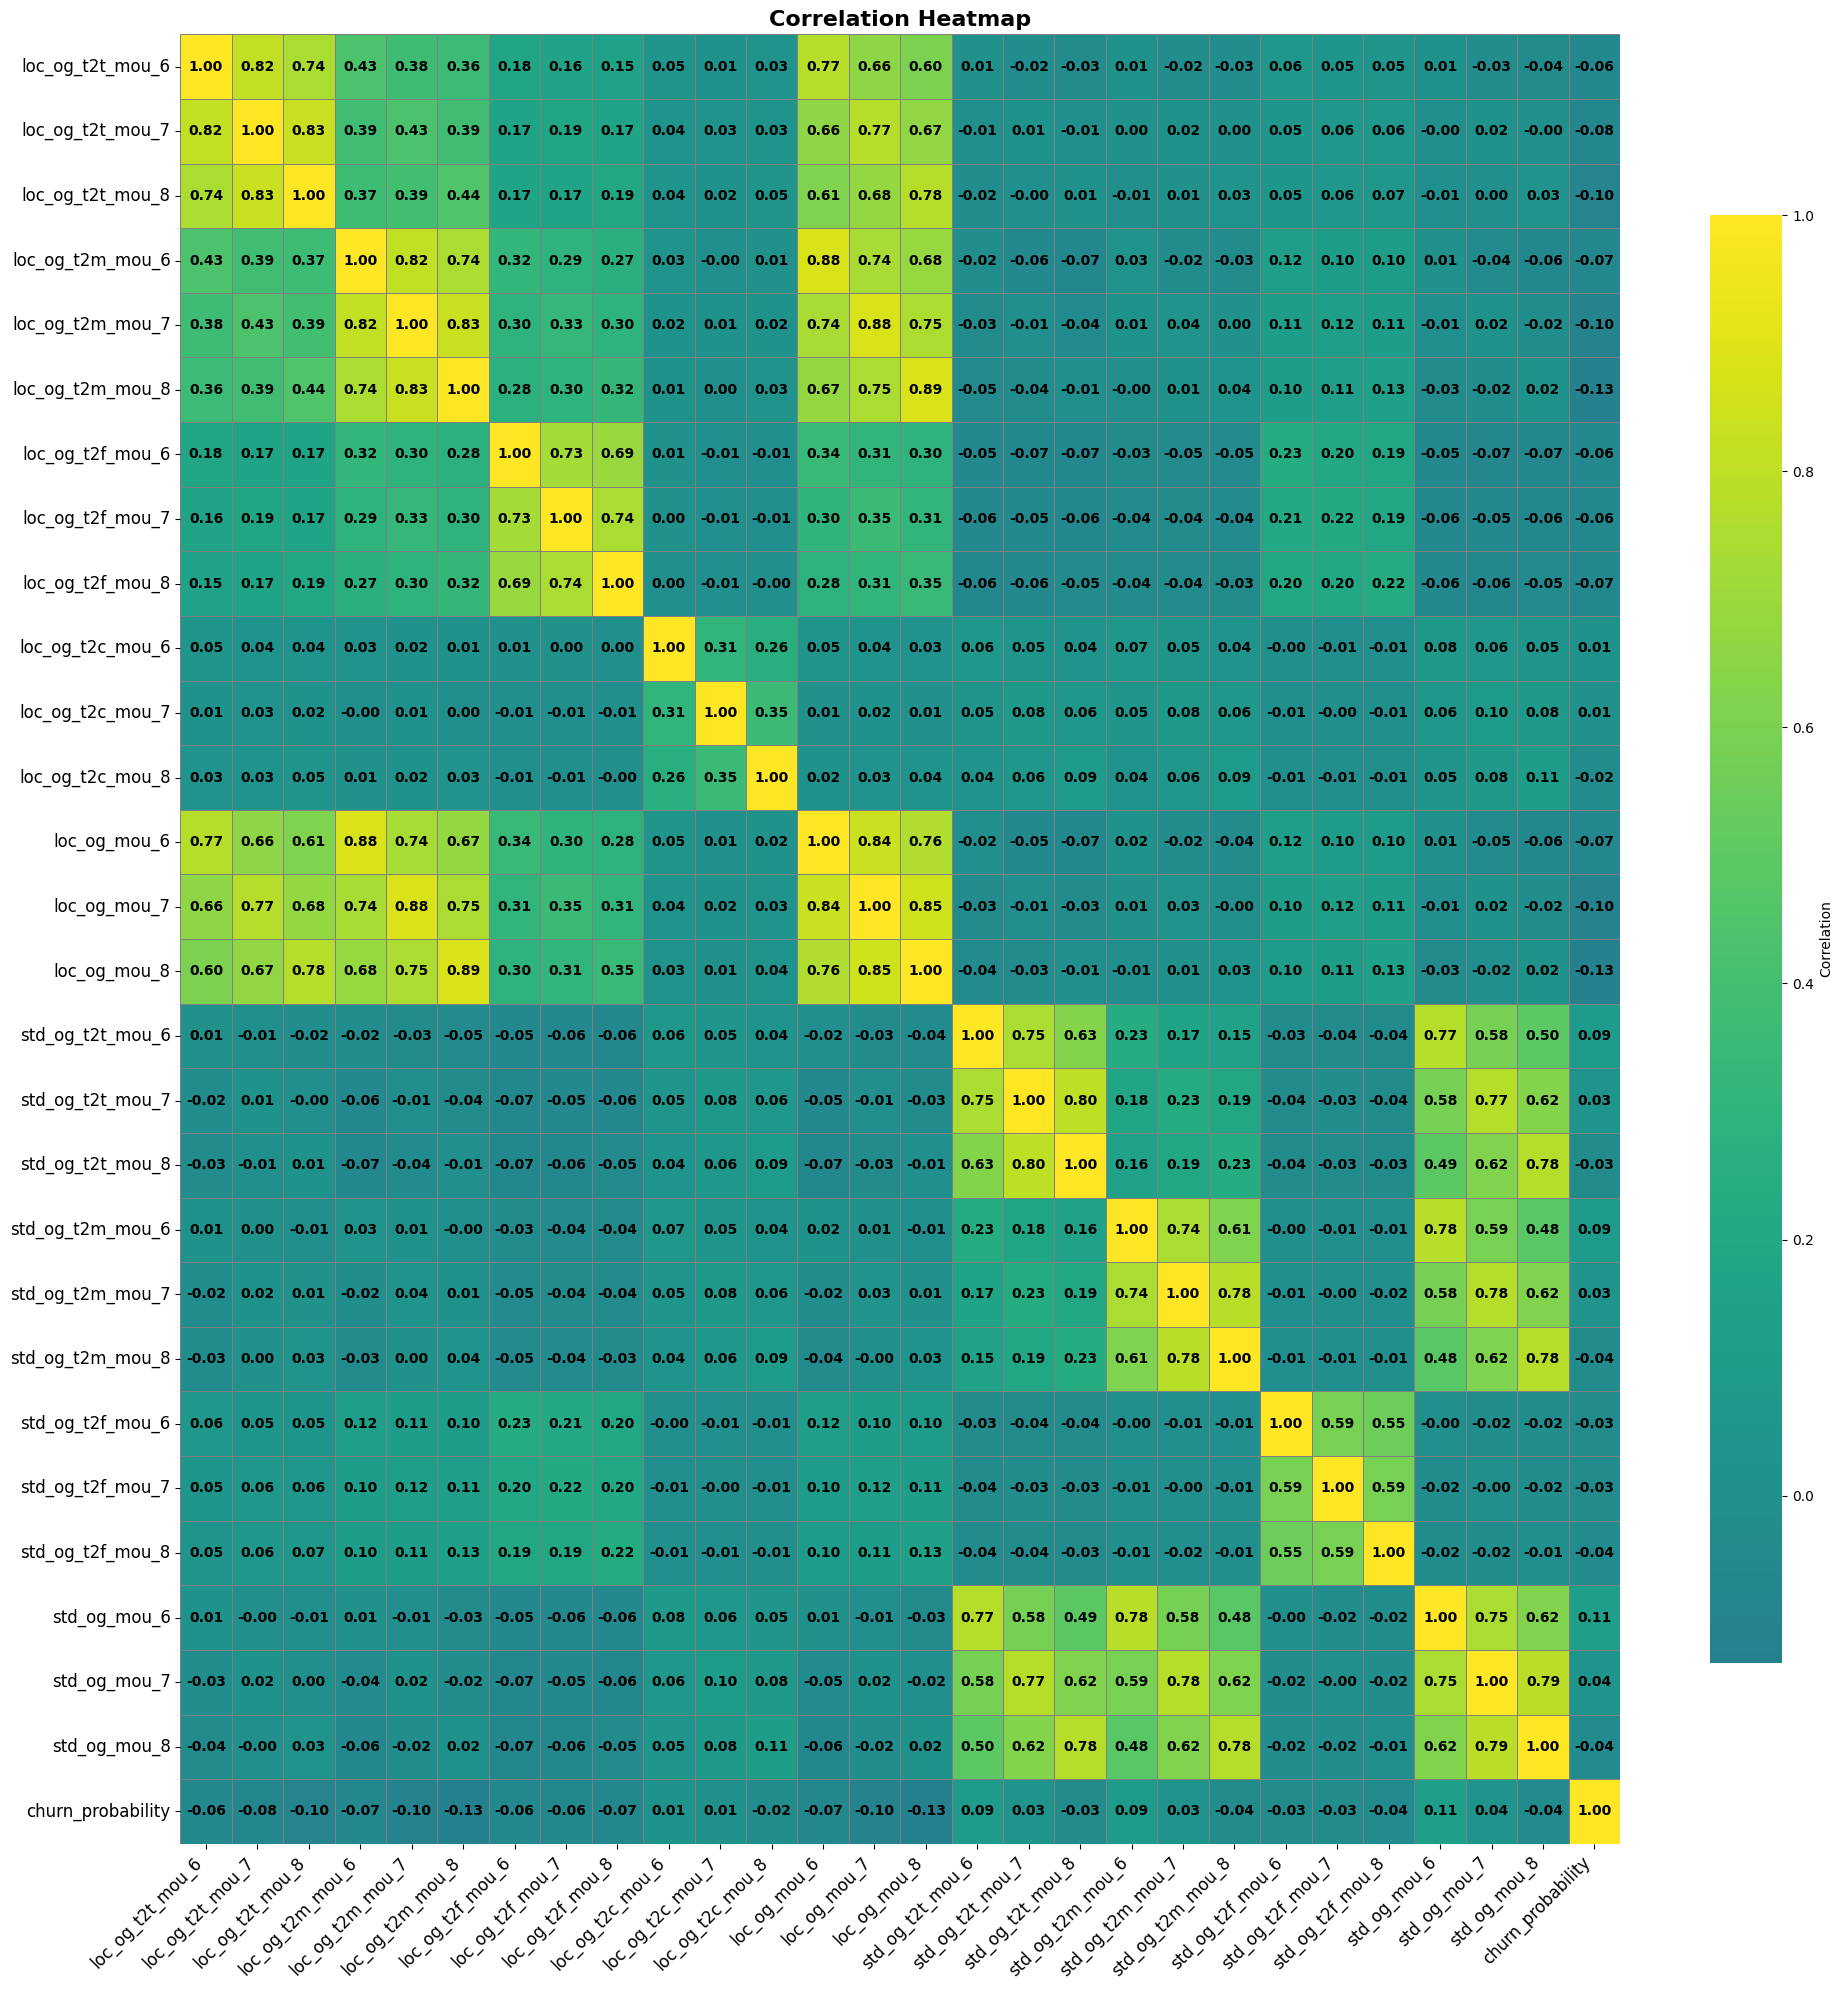

In [34]:
plt.figure(figsize=(20, 20))  # Set the figure size

# Create the heatmap
sns.heatmap(corr_outgoing_col, 
            annot=True,  # Annotate the cells with correlation values
            cmap='viridis',  # Color palette: 'coolwarm' is a balanced palette
            center=0,  # Center the color palette at 0
            linewidths=0.5,  # Add slight separation between cells
            linecolor='gray',  # Gray line color
            cbar_kws={'shrink': 0.8, 'label': 'Correlation'},  # Colorbar label and shrinkage
            fmt='.2f',  # Format for annotation (2 decimal places)
            annot_kws={'size': 10, 'weight': 'bold', 'color': 'black'})  # Font style for annotations

# Improve readability
plt.title("Correlation Heatmap", fontsize=16, weight='bold')  # Add title
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better fit
plt.yticks(rotation=0, fontsize=12)  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()

In [35]:
incoming_col

Index(['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8'], dtype='object')

In [36]:
corr_incoming_col = df[['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 
                        'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 
                        'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6',
                        'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 
                        'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'churn_probability']].corr()

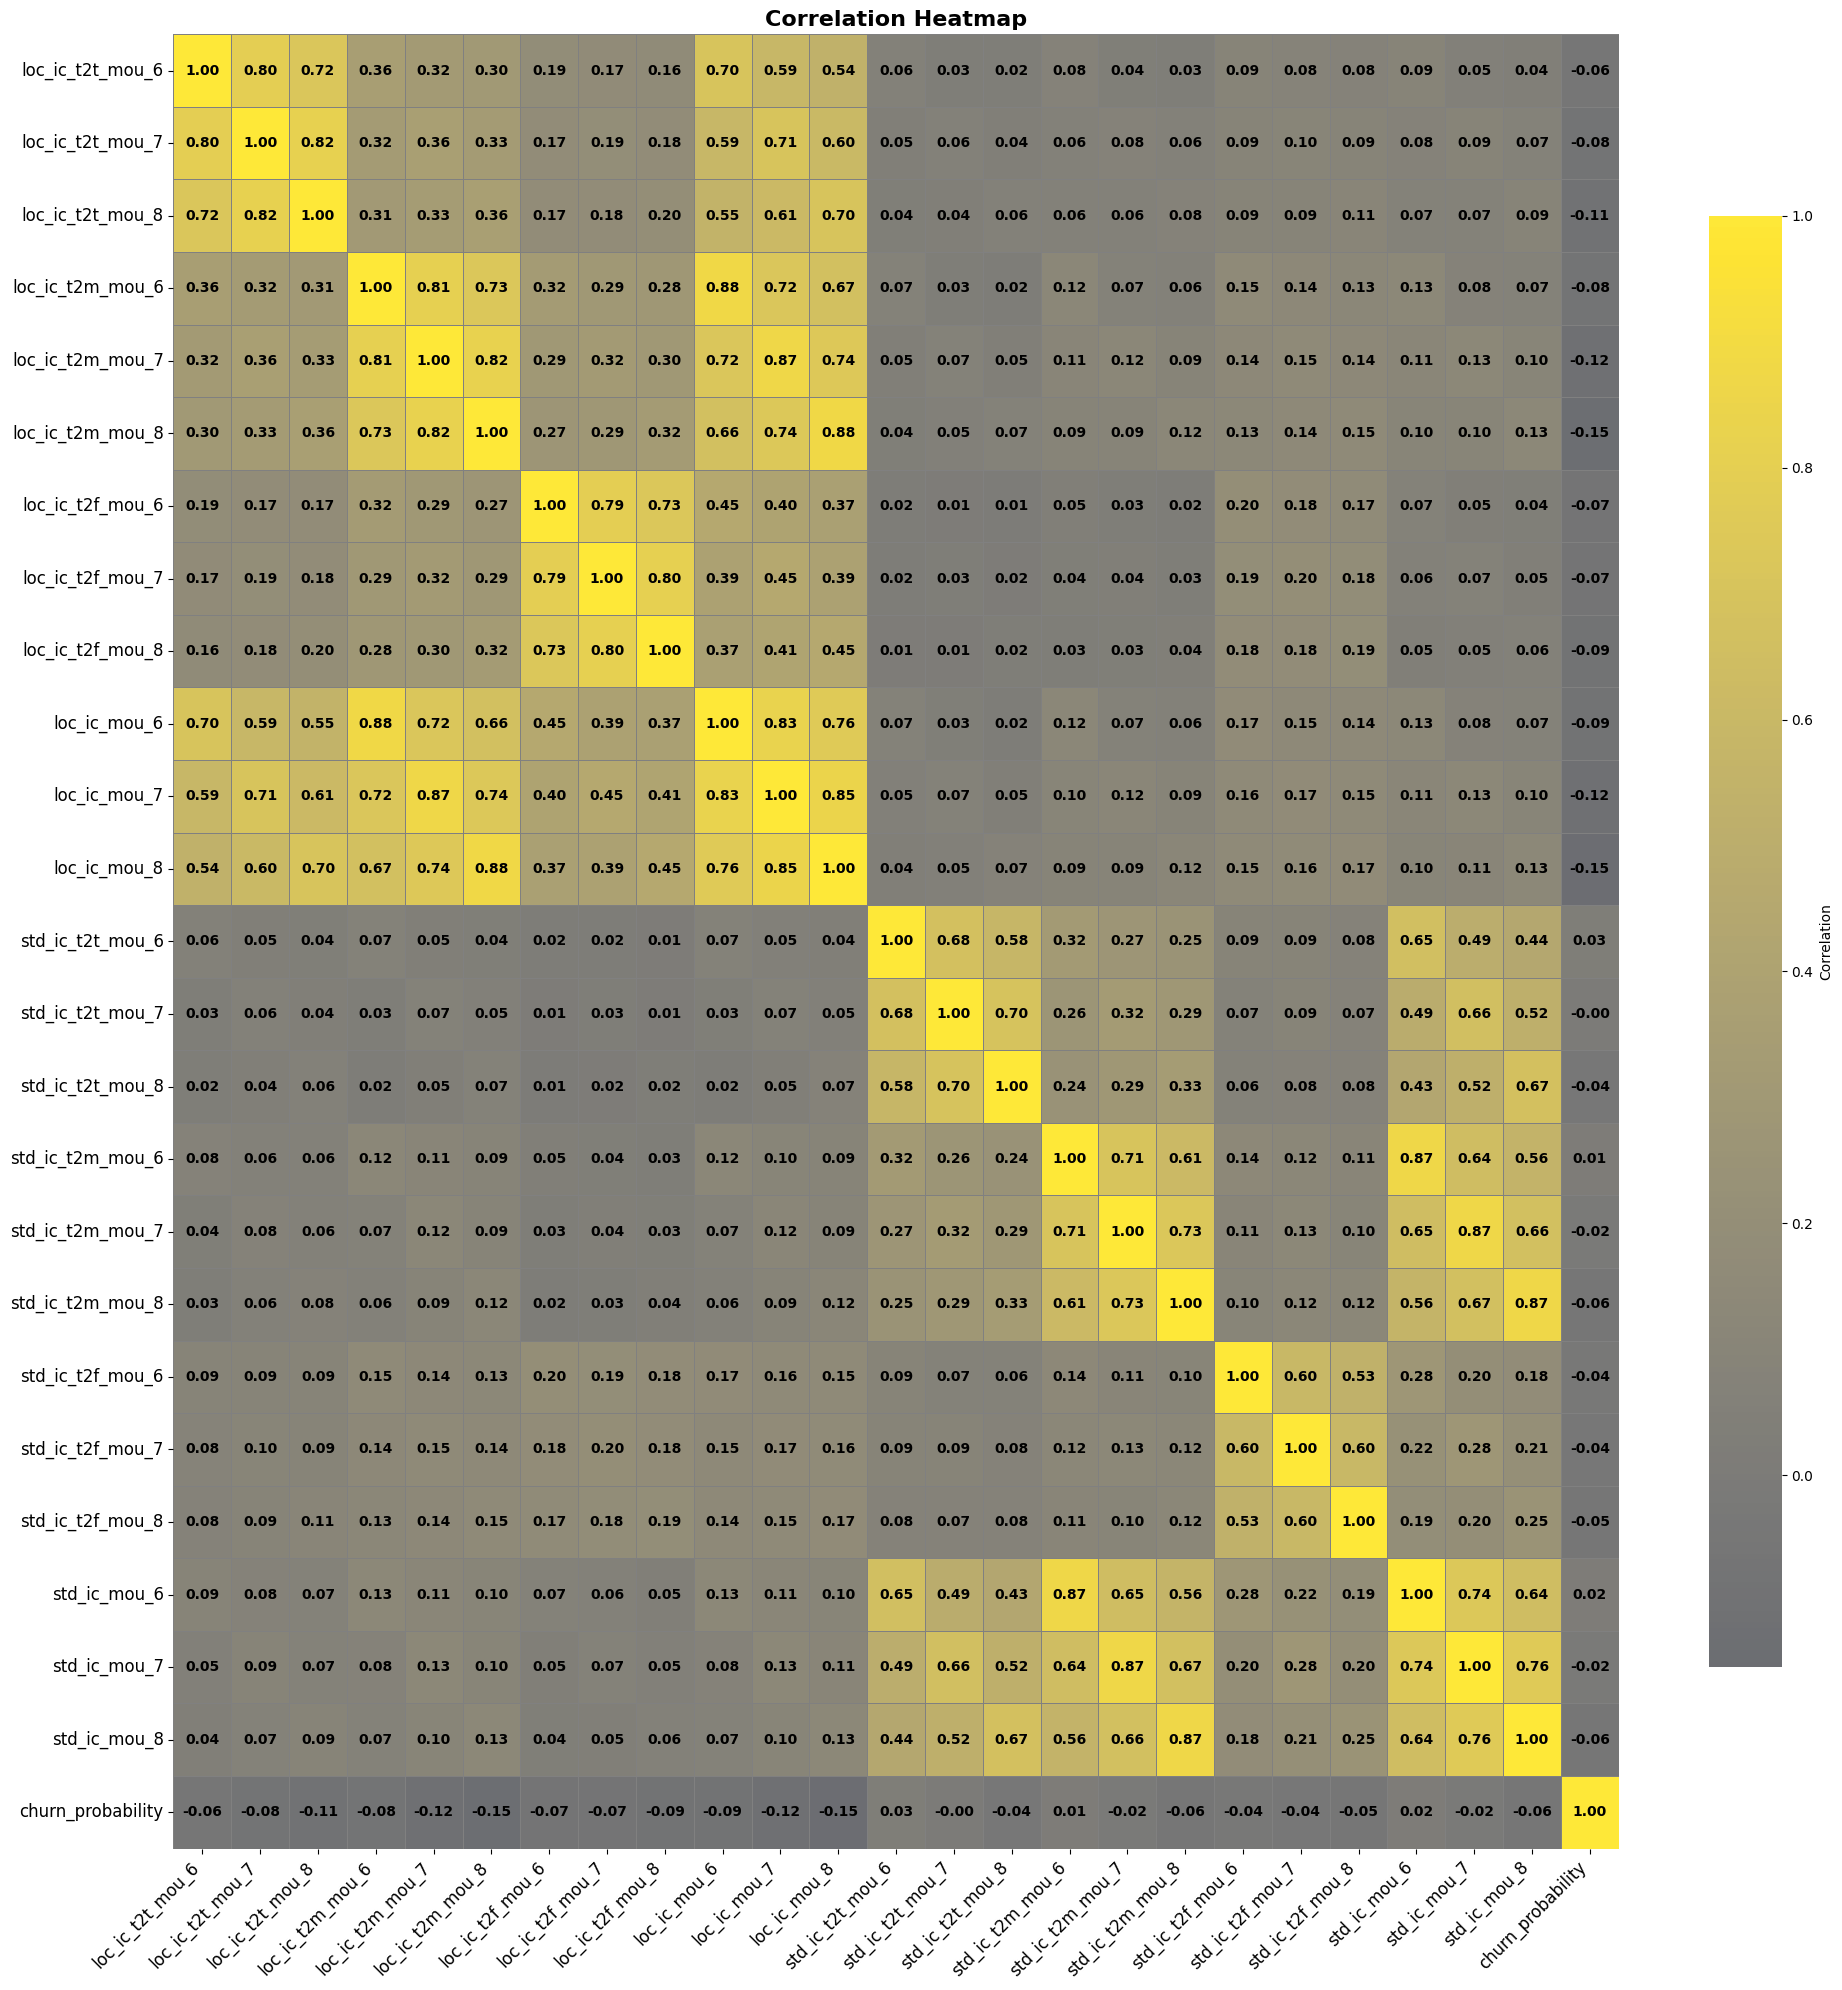

In [37]:
plt.figure(figsize=(20, 20))  # Set the figure size

# Create the heatmap
sns.heatmap(corr_incoming_col, 
            annot=True,  # Annotate the cells with correlation values
            cmap='cividis',  # Color palette: 'coolwarm' is a balanced palette
            center=0,  # Center the color palette at 0
            linewidths=0.5,  # Add slight separation between cells
            linecolor='gray',  # Gray line color
            cbar_kws={'shrink': 0.8, 'label': 'Correlation'},  # Colorbar label and shrinkage
            fmt='.2f',  # Format for annotation (2 decimal places)
            annot_kws={'size': 10, 'weight': 'bold', 'color': 'black'})  # Font style for annotations

# Improve readability
plt.title("Correlation Heatmap", fontsize=16, weight='bold')  # Add title
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better fit
plt.yticks(rotation=0, fontsize=12)  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show the plot
plt.show()

## Feature Engineering

In [38]:
y = train_data.pop('churn_probability')

In [39]:
X = train_data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [41]:
lower_limit = X_train.quantile(0.01)
upper_limit = X_train.quantile(0.99)

# Cap the values outside the 1st and 99th percentiles
X_train = X_train.apply(lambda x: x.clip(lower=lower_limit[x.name], upper=upper_limit[x.name]))
X_test = X_test.apply(lambda x: x.clip(lower=lower_limit[x.name], upper=upper_limit[x.name]))

In [42]:
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer with the strategy 'median'
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Fit and transform the data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)
test_data = pd.DataFrame(imputer.transform(test_data), columns=test_data.columns, index=test_data.index)

In [43]:
scaler = StandardScaler()

In [44]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [46]:
test_data = scaler.transform(test_data)

In [47]:
X_train.shape

(55999, 112)

In [48]:
X_test.shape

(14000, 112)

In [49]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [50]:
pca.components_

array([[ 1.68561446e-01,  1.81994010e-01,  1.71864898e-01, ...,
         3.88647344e-02,  1.33579369e-02,  1.11363875e-02],
       [ 6.34076486e-02,  8.18813700e-02,  7.28336412e-02, ...,
        -4.11868103e-02, -3.21794982e-03,  1.57702130e-02],
       [-3.68092053e-02, -3.21218803e-02, -3.00521898e-02, ...,
         1.63275344e-02,  4.36155610e-03,  2.56618957e-03],
       ...,
       [-4.58762732e-03,  9.42389756e-03, -4.42621669e-03, ...,
        -1.65616793e-04, -9.89021575e-05,  5.51823359e-06],
       [-1.19223223e-03, -9.15358260e-04,  1.19797651e-03, ...,
         4.19672299e-04,  2.82189935e-04, -1.67782551e-04],
       [ 1.63086641e-03, -3.08350522e-03,  2.65695917e-03, ...,
        -7.92273716e-04,  2.83135015e-04, -2.20805808e-04]])

In [51]:
pca.explained_variance_ratio_

array([1.73556057e-01, 9.43710576e-02, 5.20866601e-02, 4.87915024e-02,
       3.93396747e-02, 3.33088005e-02, 3.12416339e-02, 2.86055334e-02,
       2.59898277e-02, 2.43058814e-02, 2.38262397e-02, 2.21021638e-02,
       1.93303690e-02, 1.79980112e-02, 1.63591497e-02, 1.42321009e-02,
       1.35447311e-02, 1.34182824e-02, 1.22378662e-02, 1.16628497e-02,
       1.09236273e-02, 1.05100458e-02, 1.01704411e-02, 9.64589982e-03,
       9.35416223e-03, 8.92257039e-03, 8.80680443e-03, 8.10546638e-03,
       7.96650280e-03, 7.65088503e-03, 7.52907019e-03, 7.27019755e-03,
       7.10758832e-03, 7.00949561e-03, 6.78781956e-03, 6.49106753e-03,
       6.22576844e-03, 6.15195665e-03, 5.83349873e-03, 5.50152725e-03,
       5.35496250e-03, 5.14443314e-03, 4.97794418e-03, 4.80331624e-03,
       4.69755321e-03, 4.58475734e-03, 4.25645263e-03, 3.89196854e-03,
       3.70605734e-03, 3.68160809e-03, 3.60232587e-03, 3.51858542e-03,
       3.25897438e-03, 3.09631422e-03, 3.06200103e-03, 3.01227163e-03,
      

In [52]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

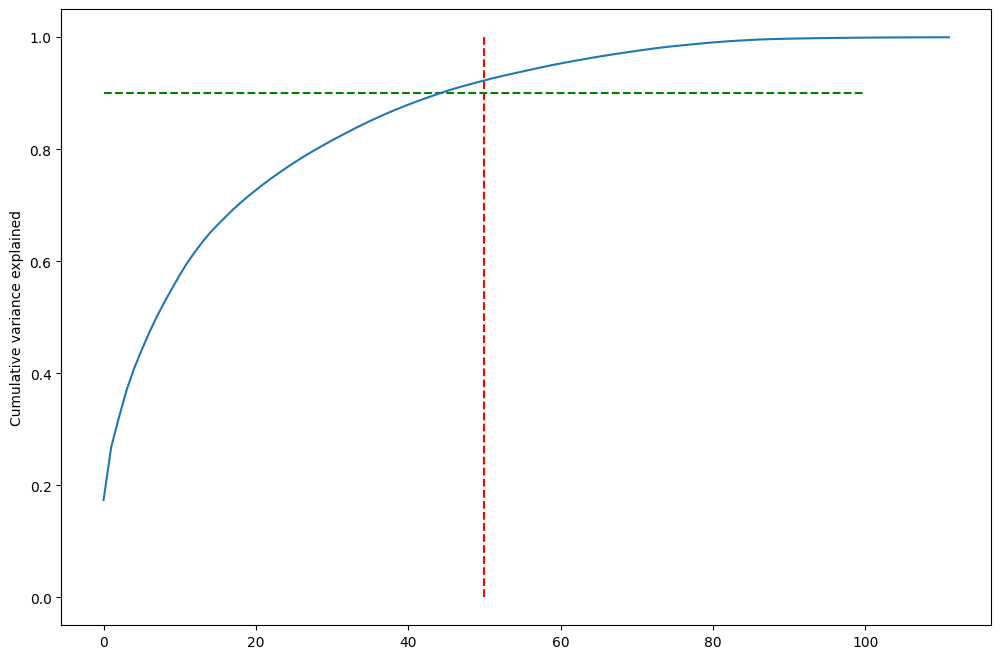

In [53]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [54]:
pca_final = IncrementalPCA(n_components=55)
df_train_pca = pca_final.fit_transform(X_train)

In [55]:
df_train_pca.shape

(55999, 55)

In [56]:
corrmat = np.corrcoef(df_train_pca.transpose())

<Axes: >

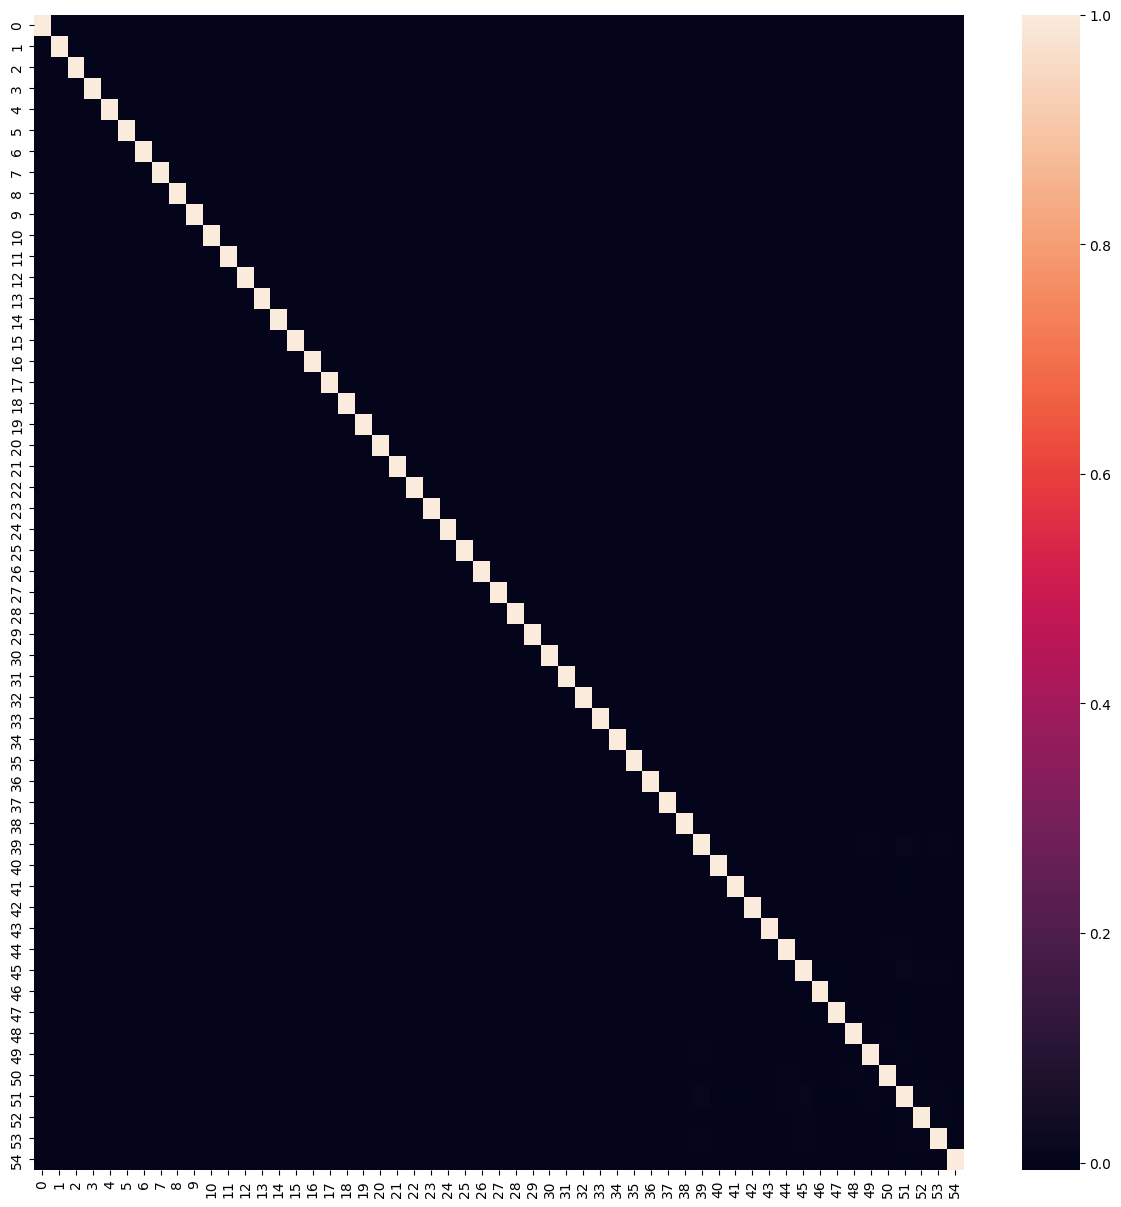

In [57]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat)

In [58]:
df_test_pca = pca_final.transform(X_test)
print(df_test_pca.shape)

(14000, 55)


In [59]:
unseen_data = pca_final.transform(test_data)

In [60]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"Metrics for {model_name}:")
    print("Accuracy: %.4f" % accuracy_score(y_true, y_pred))
    print("Precision: %.4f" % precision_score(y_true, y_pred))
    print("Recall: %.4f" % recall_score(y_true, y_pred))
    print("F1 Score: %.4f" % f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("---" * 20)

In [61]:
def train_and_evaluate_models(X_train, y_train, X_test, y_test):
    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'XGBoost': XGBClassifier(eval_metric='logloss'),  # Adding eval_metric to avoid warnings
        'GradientBoosting':GradientBoostingClassifier()
    }

    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")
        model.fit(X_train, y_train)

        # Predictions for train and test sets
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)

        # Evaluate on train set
        print(f"\nTrain Metrics for {model_name}:")
        evaluate_model(y_train, pred_train, model_name + " (Train)")

        # Evaluate on test set
        print(f"\nTest Metrics for {model_name}:")
        evaluate_model(y_test, pred_test, model_name + " (Test)")

## Model Building with PCA

In [62]:
train_and_evaluate_models(df_train_pca, y_train, df_test_pca, y_test)


Training Logistic Regression...

Train Metrics for Logistic Regression:
Metrics for Logistic Regression (Train):
Accuracy: 0.9175
Precision: 0.6907
Recall: 0.3440
F1 Score: 0.4593
Confusion Matrix:
 [[49414   879]
 [ 3743  1963]]
------------------------------------------------------------

Test Metrics for Logistic Regression:
Metrics for Logistic Regression (Test):
Accuracy: 0.9165
Precision: 0.6944
Recall: 0.3219
F1 Score: 0.4399
Confusion Matrix:
 [[12372   202]
 [  967   459]]
------------------------------------------------------------

Training Random Forest...

Train Metrics for Random Forest:
Metrics for Random Forest (Train):
Accuracy: 1.0000
Precision: 1.0000
Recall: 0.9998
F1 Score: 0.9999
Confusion Matrix:
 [[50293     0]
 [    1  5705]]
------------------------------------------------------------

Test Metrics for Random Forest:
Metrics for Random Forest (Test):
Accuracy: 0.9171
Precision: 0.7288
Recall: 0.2959
F1 Score: 0.4209
Confusion Matrix:
 [[12417   157]
 [ 1004  

### Hyperparameter Tunning

In [63]:
# Define the parameter grid
param_grid = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'  # Adjust scoring metric based on the problem
)

# Fit the model on training data
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=2)

In [64]:
# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(df_test_pca)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nTest Metrics for Tuned Random Forest:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 100}
Best Score: 0.9181950078450882

Test Metrics for Tuned Random Forest:
Accuracy: 0.9166
Precision: 0.7329
Recall: 0.2847
F1 Score: 0.4101
Confusion Matrix:
 [[12426   148]
 [ 1020   406]]


In [65]:
pred_train = best_model.predict(df_train_pca)
pred_test = best_model.predict(df_test_pca)

# Evaluate on train set
print(f"\nTrain Metrics for final_model:")
evaluate_model(y_train, pred_train, best_model)

# Evaluate on test set
print(f"\nTest Metrics for final_model:")
evaluate_model(y_test, pred_test, best_model)


Train Metrics for final_model:
Metrics for RandomForestClassifier(max_depth=20, min_samples_leaf=5, random_state=42):
Accuracy: 0.9652
Precision: 0.9875
Recall: 0.6668
F1 Score: 0.7961
Confusion Matrix:
 [[50245    48]
 [ 1901  3805]]
------------------------------------------------------------

Test Metrics for final_model:
Metrics for RandomForestClassifier(max_depth=20, min_samples_leaf=5, random_state=42):
Accuracy: 0.9166
Precision: 0.7329
Recall: 0.2847
F1 Score: 0.4101
Confusion Matrix:
 [[12426   148]
 [ 1020   406]]
------------------------------------------------------------


In [66]:
import xgboost as xgb
# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 3, 5, 7],
    'scale_pos_weight': [1, 5, 10, 15, 20]
}
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_jobs=-1)

# Use RandomizedSearchCV to search for the best parameters
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings sampled
    scoring='accuracy',  # Choose an evaluation metric that suits your problem
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(df_train_pca, y_train)

# Print best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate on test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(df_test_pca)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nTest Metrics for Tuned XGBoost:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'subsample': 0.9, 'scale_pos_weight': 1, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best Score: 0.9264630069011265

Test Metrics for Tuned XGBoost:
Accuracy: 0.9252
Precision: 0.6940
Recall: 0.4755
F1 Score: 0.5643
Confusion Matrix:
 [[12275   299]
 [  748   678]]


In [67]:
final_model = random_search.best_estimator_

In [68]:
final_model.fit(df_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
pred_train = final_model.predict(df_train_pca)
pred_test = final_model.predict(df_test_pca)
# Evaluate on train set
print(f"\nTrain Metrics for final_model:")
evaluate_model(y_train, pred_train, final_model)

# Evaluate on test set
print(f"\nTest Metrics for final_model:")
evaluate_model(y_test, pred_test, final_model)


Train Metrics for final_model:
Metrics for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...):
Accuracy: 0.9907
Precision: 0.9920
Recall: 0.9161
F1 Score: 0.9525
Confusion Matrix:
 [[50251    42]
 [  479  5227]]
------------------------------------------------------------

Test Metrics for final_model:

In [70]:
churn_probability = final_model.predict(unseen_data)

In [71]:
submission_df = pd.DataFrame({'id':id,
            'churn_probability': churn_probability})

In [72]:
submission_df

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,0
29998,99997,0


## Model Building without PCA

In [73]:
train_and_evaluate_models(X_train, y_train, X_test, y_test)


Training Logistic Regression...

Train Metrics for Logistic Regression:
Metrics for Logistic Regression (Train):
Accuracy: 0.9191
Precision: 0.6971
Recall: 0.3635
F1 Score: 0.4778
Confusion Matrix:
 [[49392   901]
 [ 3632  2074]]
------------------------------------------------------------

Test Metrics for Logistic Regression:
Metrics for Logistic Regression (Test):
Accuracy: 0.9189
Precision: 0.7048
Recall: 0.3499
F1 Score: 0.4677
Confusion Matrix:
 [[12365   209]
 [  927   499]]
------------------------------------------------------------

Training Random Forest...

Train Metrics for Random Forest:
Metrics for Random Forest (Train):
Accuracy: 1.0000
Precision: 1.0000
Recall: 0.9998
F1 Score: 0.9999
Confusion Matrix:
 [[50293     0]
 [    1  5705]]
------------------------------------------------------------

Test Metrics for Random Forest:
Metrics for Random Forest (Test):
Accuracy: 0.9393
Precision: 0.7824
Recall: 0.5596
F1 Score: 0.6525
Confusion Matrix:
 [[12352   222]
 [  628  

### Logistic Rgression

In [74]:
logistic_reg = LogisticRegression()

In [75]:
rfe = RFE(estimator=logistic_reg, n_features_to_select=60)
rfe = rfe.fit(X_train, y_train)

In [76]:
rfe.support_

array([ True,  True,  True,  True, False,  True, False, False,  True,
       False,  True, False,  True, False,  True,  True, False,  True,
        True, False,  True,  True, False, False, False, False, False,
        True,  True,  True,  True, False,  True,  True, False, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True, False, False,  True,  True, False,  True,
        True, False, False,  True, False,  True,  True, False, False,
        True,  True, False,  True, False, False,  True, False, False,
       False,  True, False, False,  True,  True,  True, False,  True,
       False, False, False,  True, False, False,  True,  True, False,
        True, False,  True,  True,  True,  True,  True, False, False,
        True, False, False,  True, False, False,  True,  True,  True,
        True, False,  True,  True])

In [77]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', False, 29),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 31),
 ('offnet_mou_7', False, 3),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 30),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 49),
 ('roam_og_mou_6', True, 1),
 ('roam_og_mou_7', False, 18),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', True, 1),
 ('loc_og_t2t_mou_7', False, 2),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', False, 15),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2f_mou_7', False, 52),
 ('loc_og_t2f_mou_8', False, 46),
 ('loc_og_t2c_mou_6', False, 10),
 ('loc_og_t2c_mou_7', False, 14),
 ('loc_og_t2c_mou_8', False, 7),
 ('loc_og_mou_6', True, 1),
 ('loc_og_mou_7', True, 1),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', False, 44),
 ('std_og_t2t_mou_8', True, 1),
 ('std

In [78]:
col = X_train.columns[rfe.support_]

In [79]:
X_train.columns[~rfe.support_]

Index(['onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_8', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_amt_7', 'max_rech_amt_6', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_3g_mb_6', 'vol_3g_mb_7', 'sachet_2g_6', 'sachet_2g_7', 'jun_vbc_3g'], dtype='object')

In [80]:
def refine_logistic_model(X_train, y_train, threshold_pval=0.05, threshold_vif=10):
    X = X_train.copy()  # Work with a copy of the training set to avoid modifying the original data
    columns_dropped = []  # Track dropped columns
    current_accuracy = None
    
    while True:
        # Add constant to X
        X_with_const = sm.add_constant(X)

        # Fit the GLM model
        model = sm.GLM(y_train, X_with_const, family=sm.families.Binomial()).fit()

        # Get p-values and VIFs
        pvalues = model.pvalues
        vif = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

        # Create a DataFrame to analyze features
        stats = pd.DataFrame({
            'Feature': X_with_const.columns,
            'Pvalue': pvalues,
            'VIF': vif
        })

        # Drop the constant row for analysis
        stats = stats[stats['Feature'] != 'const']

        # Check if any p-value > threshold_pval exists
        if (stats['Pvalue'] > threshold_pval).any():
            # Find the feature with the highest p-value
            feature_to_drop = stats.loc[stats['Pvalue'].idxmax(), 'Feature']
            print(f"Dropping feature '{feature_to_drop}' due to high P-value ({stats['Pvalue'].max():.3f})")
        elif (stats['VIF'] > threshold_vif).any():
            # Find the feature with the highest VIF
            feature_to_drop = stats.loc[stats['VIF'].idxmax(), 'Feature']
            print(f"Dropping feature '{feature_to_drop}' due to high VIF ({stats['VIF'].max():.2f})")
        else:
            print("No features with high P-value or high VIF. Model refinement complete.")
            break

        # Drop the identified feature
        X.drop(columns=[feature_to_drop], inplace=True)
        columns_dropped.append(feature_to_drop)

    # Fit the final model and return results
    final_model = sm.GLM(y_train, sm.add_constant(X), family=sm.families.Binomial()).fit()
    final_accuracy = final_model.aic  # Example metric; adjust as needed
    print(f"Model refinement complete. Final model accuracy (AIC): {final_accuracy}")
    return final_model, X, columns_dropped

In [81]:
final_model, X, columns_dropped = refine_logistic_model(X_train[col], y_train)

Dropping feature 'std_og_mou_6' due to high P-value (0.562)
Dropping feature 'onnet_mou_6' due to high P-value (0.563)
Dropping feature 'std_og_t2t_mou_8' due to high P-value (0.591)
Dropping feature 'loc_og_t2t_mou_6' due to high P-value (0.441)
Dropping feature 'loc_og_t2m_mou_6' due to high P-value (0.327)
Dropping feature 'loc_og_mou_6' due to high P-value (0.304)
Dropping feature 'arpu_8' due to high P-value (0.184)
Dropping feature 'total_rech_amt_6' due to high P-value (0.065)
Dropping feature 'last_day_rch_amt_7' due to high P-value (0.066)
Dropping feature 'total_og_mou_7' due to high VIF (60.14)
Dropping feature 'loc_og_mou_7' due to high P-value (0.439)
Dropping feature 'std_og_mou_7' due to high P-value (0.473)
Dropping feature 'jul_vbc_3g' due to high P-value (0.069)
Dropping feature 'loc_og_mou_8' due to high VIF (48.11)
Dropping feature 'loc_og_t2t_mou_8' due to high P-value (0.679)
Dropping feature 'loc_ic_mou_8' due to high VIF (41.76)
Dropping feature 'loc_ic_mou_7' d

In [82]:
col = col.drop(columns_dropped)

In [83]:
corr_matrix = X_train[col].corr()

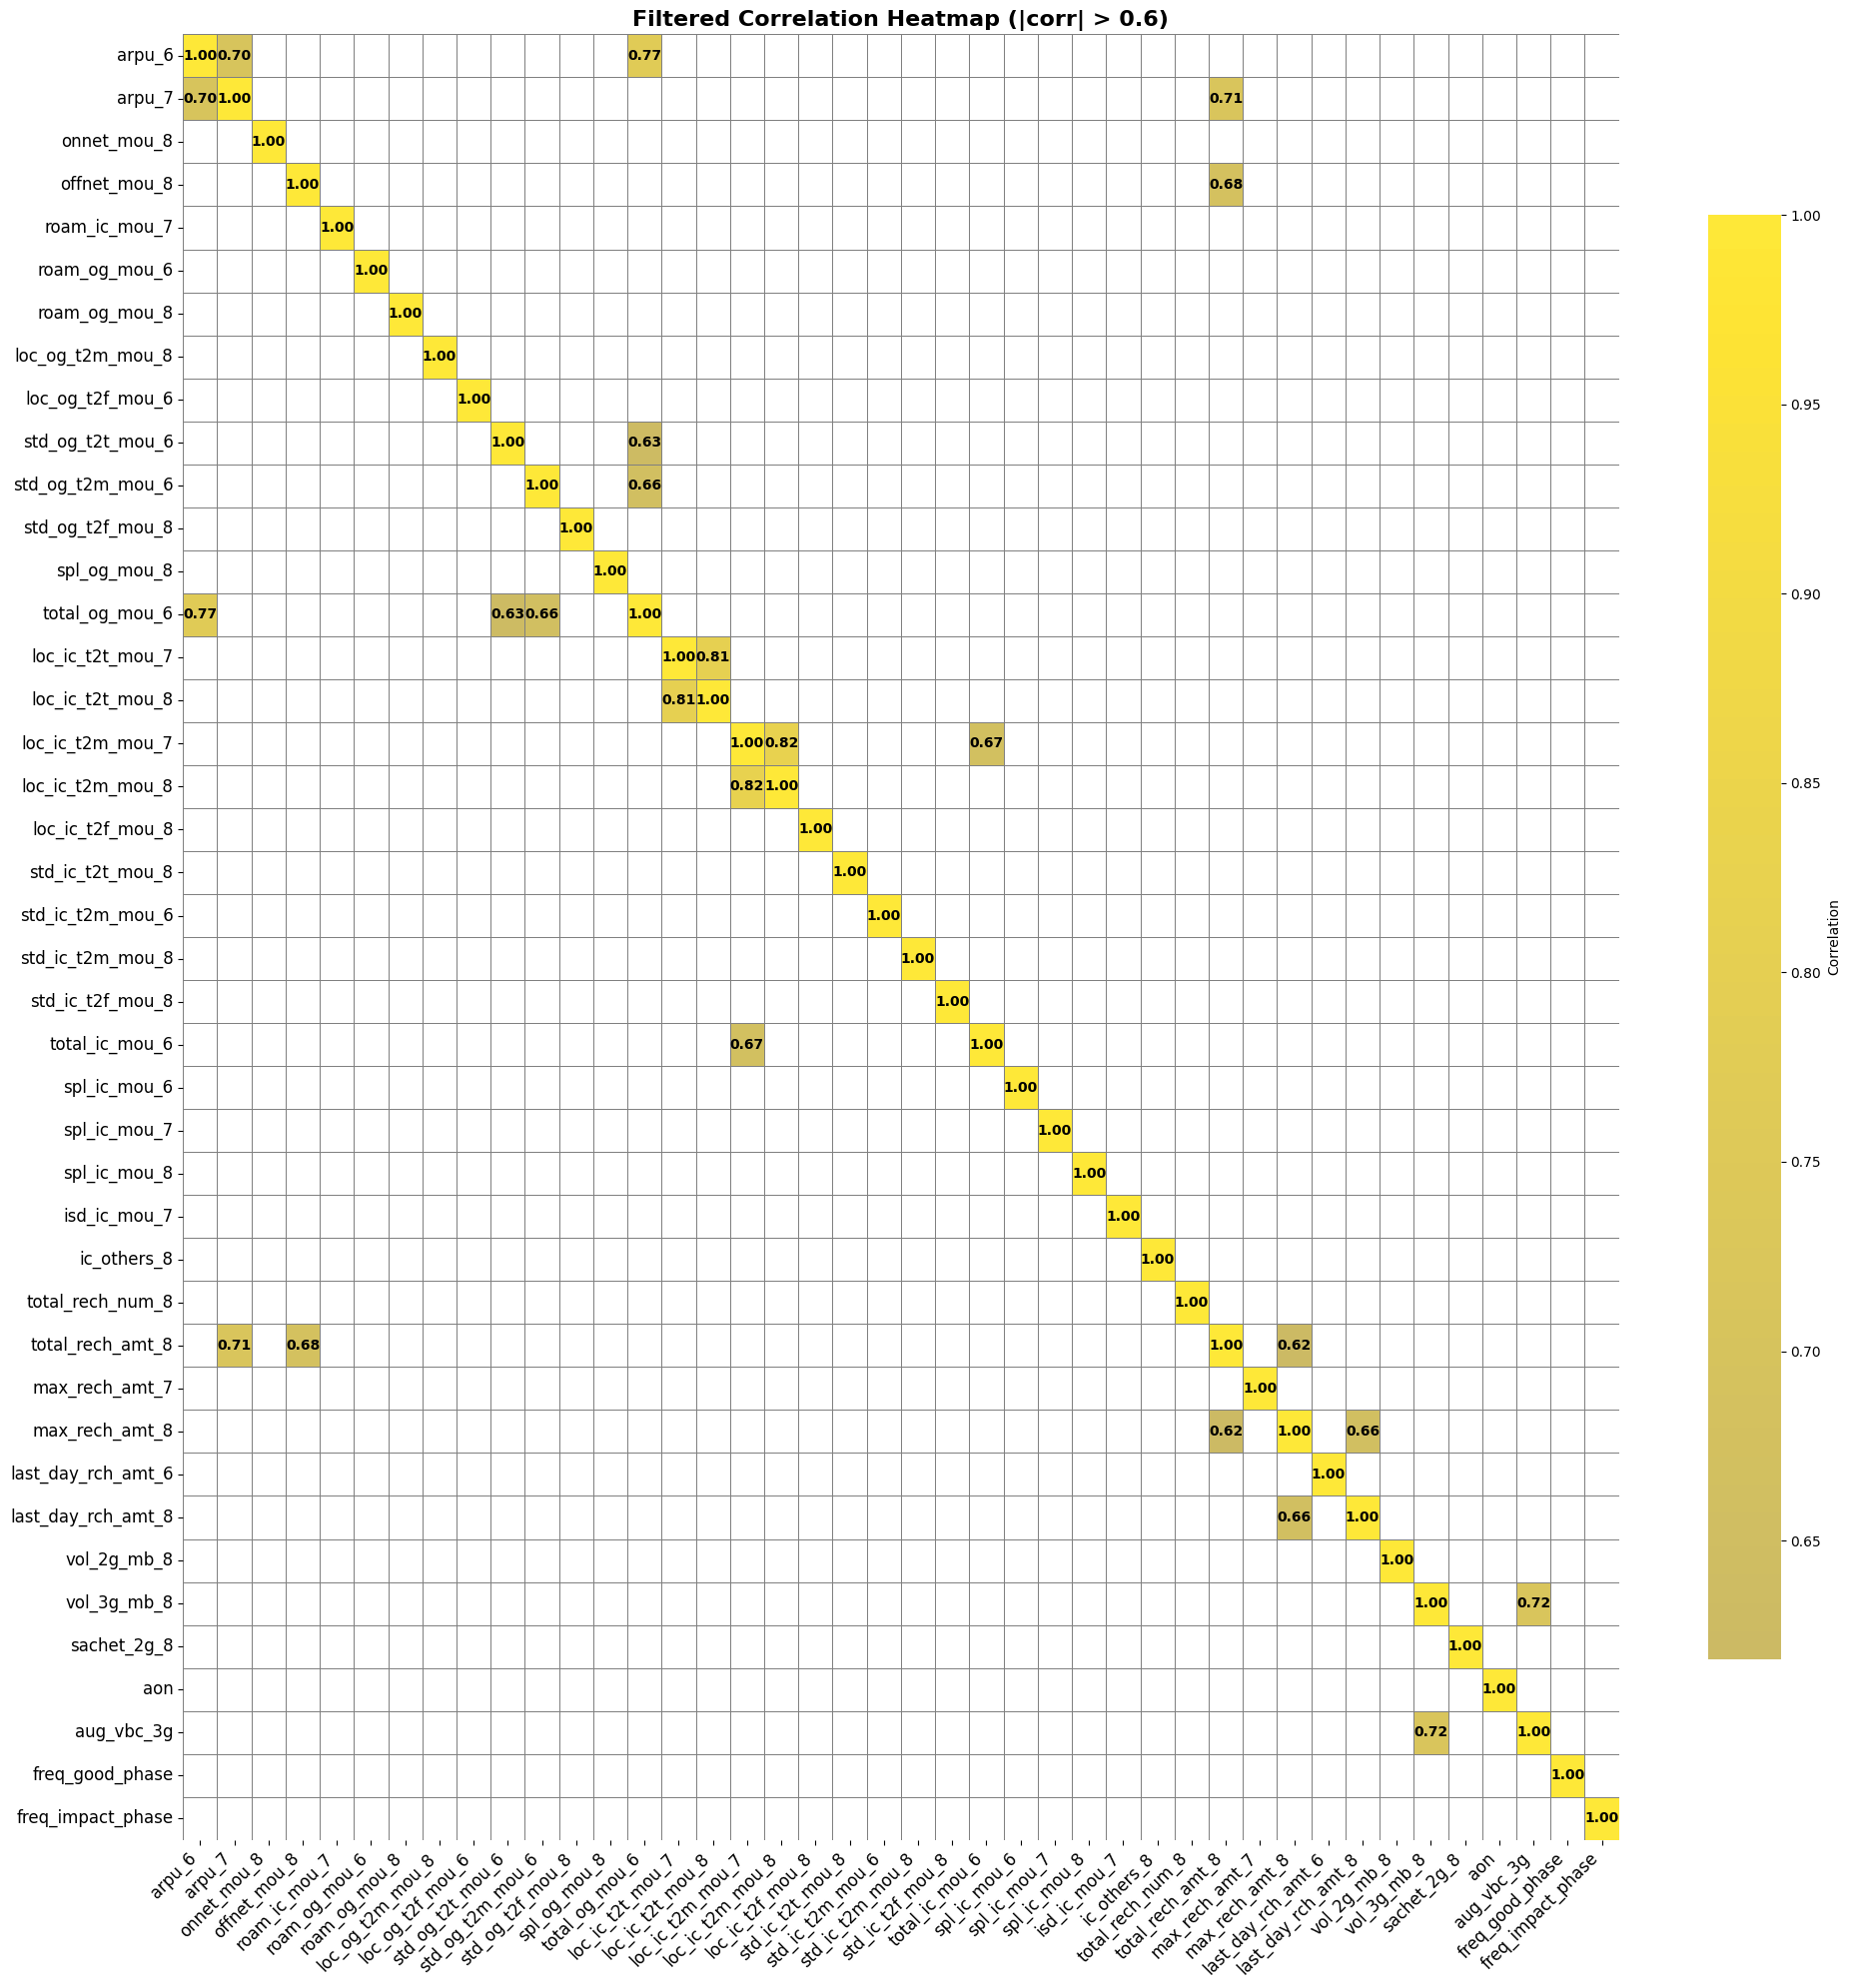

In [84]:
# Filter correlations above |0.6|
filtered_corr_matrix = corr_matrix[(corr_matrix > 0.6) | (corr_matrix < -0.6)]

# Drop rows and columns that are completely NaN after filtering
filtered_corr_matrix = filtered_corr_matrix.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Plot the heatmap for the filtered correlation matrix
plt.figure(figsize=(20, 20))  # Set figure size

sns.heatmap(filtered_corr_matrix, 
            annot=True,  # Annotate cells with values
            cmap='cividis',  # Color palette
            center=0,  # Center color palette at 0
            linewidths=0.5,  # Add slight separation between cells
            linecolor='gray',  # Line color between cells
            cbar_kws={'shrink': 0.8, 'label': 'Correlation'},  # Customize colorbar
            fmt='.2f',  # Format annotations to 2 decimal places
            annot_kws={'size': 10, 'weight': 'bold', 'color': 'black'})  # Style annotations

# Improve readability
plt.title("Filtered Correlation Heatmap (|corr| > 0.6)", fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()  # Prevent label clipping

# Show the plot
plt.show()

In [85]:
# Define the logistic regression model
logistic_model = LogisticRegression(solver='saga', max_iter=5000, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type: L1 (Lasso) or L2 (Ridge)
    'C': [0.01, 0.1, 1, 10, 100]  # Regularization strength (inverse of alpha)
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=logistic_model,
    param_grid=param_grid,
    scoring='accuracy',  # Metric for evaluation
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Display progress
    n_jobs=-1  # Use all available cores
)

# Fit the model to the training data
grid_search.fit(X_train[col], y_train)

# Get the best model and hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate on the test set
y_pred = best_model.predict(X_test[col])


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 10, 'penalty': 'l2'}


In [86]:
pred_train = best_model.predict(X_train[col])
pred_test = best_model.predict(X_test[col])

# Evaluate on train set
print(f"\nTrain Metrics for final_model:")
evaluate_model(y_train, pred_train, best_model)

# Evaluate on test set
print(f"\nTest Metrics for final_model:")
evaluate_model(y_test, pred_test, best_model)


Train Metrics for final_model:
Metrics for LogisticRegression(C=10, max_iter=5000, random_state=42, solver='saga'):
Accuracy: 0.9184
Precision: 0.6940
Recall: 0.3565
F1 Score: 0.4710
Confusion Matrix:
 [[49396   897]
 [ 3672  2034]]
------------------------------------------------------------

Test Metrics for final_model:
Metrics for LogisticRegression(C=10, max_iter=5000, random_state=42, solver='saga'):
Accuracy: 0.9183
Precision: 0.7032
Recall: 0.3422
F1 Score: 0.4604
Confusion Matrix:
 [[12368   206]
 [  938   488]]
------------------------------------------------------------


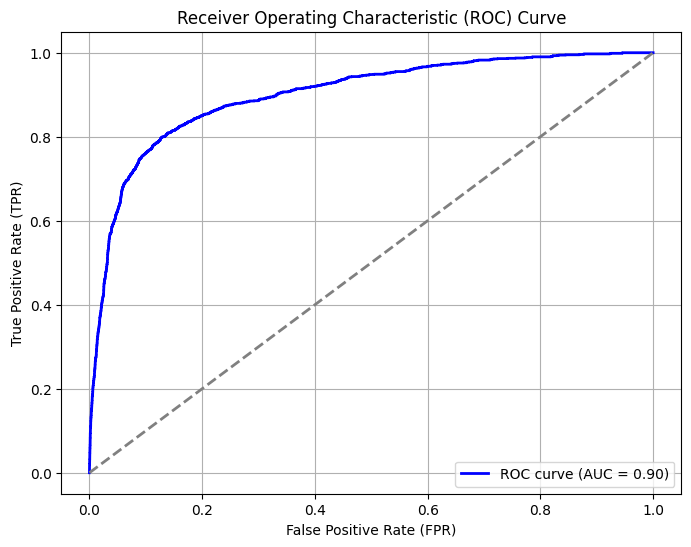

In [87]:
y_pred_prob = best_model.predict_proba(X_test[col])[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)

# Show the plot
plt.show()

### Random Forest

In [88]:
# Define the parameter grid
param_grid = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'  # Adjust scoring metric based on the problem
)

# Fit the model on training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=2)

In [89]:
# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on test data
RFM_best_model = grid_search.best_estimator_
y_pred = RFM_best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nTest Metrics for Tuned Random Forest:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 10, 'n_estimators': 100}
Best Score: 0.9425346762466036

Test Metrics for Tuned Random Forest:
Accuracy: 0.9406
Precision: 0.7902
Recall: 0.5680
F1 Score: 0.6610
Confusion Matrix:
 [[12359   215]
 [  616   810]]


In [90]:
pred_train = RFM_best_model.predict(X_train)
pred_test = RFM_best_model.predict(X_test)

# Evaluate on train set
print(f"\nTrain Metrics for final_model:")
evaluate_model(y_train, pred_train, RFM_best_model)

# Evaluate on test set
print(f"\nTest Metrics for final_model:")
evaluate_model(y_test, pred_test, RFM_best_model)


Train Metrics for final_model:
Metrics for RandomForestClassifier(max_depth=20, min_samples_leaf=10, random_state=42):
Accuracy: 0.9518
Precision: 0.8428
Recall: 0.6481
F1 Score: 0.7327
Confusion Matrix:
 [[49603   690]
 [ 2008  3698]]
------------------------------------------------------------

Test Metrics for final_model:
Metrics for RandomForestClassifier(max_depth=20, min_samples_leaf=10, random_state=42):
Accuracy: 0.9406
Precision: 0.7902
Recall: 0.5680
F1 Score: 0.6610
Confusion Matrix:
 [[12359   215]
 [  616   810]]
------------------------------------------------------------


In [91]:
importances_rf = grid_search.best_estimator_.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

print(feature_importance_rf[:30])

                Feature  Importance
75       total_ic_mou_8    0.102660
60         loc_ic_mou_8    0.085931
54     loc_ic_t2m_mou_8    0.072118
29         loc_og_mou_8    0.064115
48       total_og_mou_8    0.062318
20     loc_og_t2m_mou_8    0.045623
51     loc_ic_t2t_mou_8    0.036540
2                arpu_8    0.031258
93       max_rech_amt_8    0.028961
8          offnet_mou_8    0.024000
72         std_ic_mou_8    0.022158
17     loc_og_t2t_mou_8    0.021145
96   last_day_rch_amt_8    0.020803
14        roam_og_mou_8    0.016520
59         loc_ic_mou_7    0.015803
5           onnet_mou_8    0.014417
111   freq_impact_phase    0.014154
90     total_rech_amt_8    0.013705
53     loc_ic_t2m_mou_7    0.013306
11        roam_ic_mou_8    0.012165
99          vol_2g_mb_8    0.010996
74       total_ic_mou_7    0.010678
57     loc_ic_t2f_mou_8    0.009473
47       total_og_mou_7    0.008364
41         std_og_mou_8    0.007610
1                arpu_7    0.007118
102         vol_3g_mb_8    0

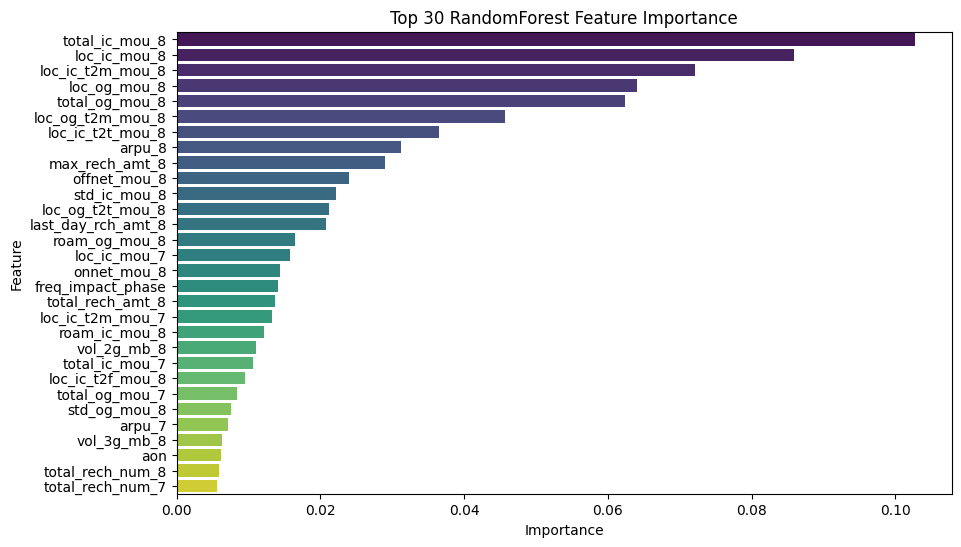

In [92]:
# Select top 30 features (if there are at least 30 features)
top_30_rf = feature_importance_rf.head(30)

# Plot top 30 feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_30_rf, palette='viridis')
plt.title('Top 30 RandomForest Feature Importance')
plt.show()

### XGBOOST

In [93]:
# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 3, 5, 7],
    'scale_pos_weight': [1, 5, 10, 15, 20]
}

# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(n_jobs=-1)

# Use RandomizedSearchCV to search for the best parameters
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=100,  # Number of parameter settings sampled
    scoring='accuracy',  # Choose an evaluation metric that suits your problem
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate on test data
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nTest Metrics for Tuned XGBoost:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'subsample': 0.9, 'scale_pos_weight': 1, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best Score: 0.9438382524587654

Test Metrics for Tuned XGBoost:
Accuracy: 0.9411
Precision: 0.7573
Recall: 0.6213
F1 Score: 0.6826
Confusion Matrix:
 [[12290   284]
 [  540   886]]


In [94]:
XGB_best_model = random_search.best_estimator_
pred_train = XGB_best_model.predict(X_train)
pred_test = XGB_best_model.predict(X_test)

# Evaluate on train set
print(f"\nTrain Metrics for final_model:")
evaluate_model(y_train, pred_train, XGB_best_model)

# Evaluate on test set
print(f"\nTest Metrics for final_model:")
evaluate_model(y_test, pred_test, XGB_best_model)


Train Metrics for final_model:
Metrics for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...):
Accuracy: 0.9839
Precision: 0.9316
Recall: 0.9092
F1 Score: 0.9203
Confusion Matrix:
 [[49912   381]
 [  518  5188]]
------------------------------------------------------------

Test Metrics for final_model:

In [95]:
importances_xgb = random_search.best_estimator_.get_booster().get_score(importance_type='weight')

# Convert to DataFrame for better readability
feature_importance_xgb = pd.DataFrame({
    'Feature': list(importances_xgb.keys()),
    'Importance': list(importances_xgb.values())
}).sort_values(by='Importance', ascending=False)

print(feature_importance_xgb[:50])

                Feature  Importance
106                 aon       914.0
111   freq_impact_phase       773.0
2                arpu_8       486.0
110     freq_good_phase       474.0
1                arpu_7       450.0
96   last_day_rch_amt_8       408.0
0                arpu_6       407.0
11        roam_ic_mou_8       383.0
6          offnet_mou_6       377.0
86     total_rech_num_7       364.0
54     loc_ic_t2m_mou_8       361.0
74       total_ic_mou_7       360.0
85     total_rech_num_6       350.0
73       total_ic_mou_6       348.0
14        roam_og_mou_8       342.0
51     loc_ic_t2t_mou_8       330.0
60         loc_ic_mou_8       329.0
50     loc_ic_t2t_mou_7       326.0
75       total_ic_mou_8       325.0
52     loc_ic_t2m_mou_6       319.0
49     loc_ic_t2t_mou_6       315.0
87     total_rech_num_8       311.0
4           onnet_mou_7       306.0
64     std_ic_t2m_mou_6       305.0
8          offnet_mou_8       303.0
90     total_rech_amt_8       303.0
70         std_ic_mou_6     

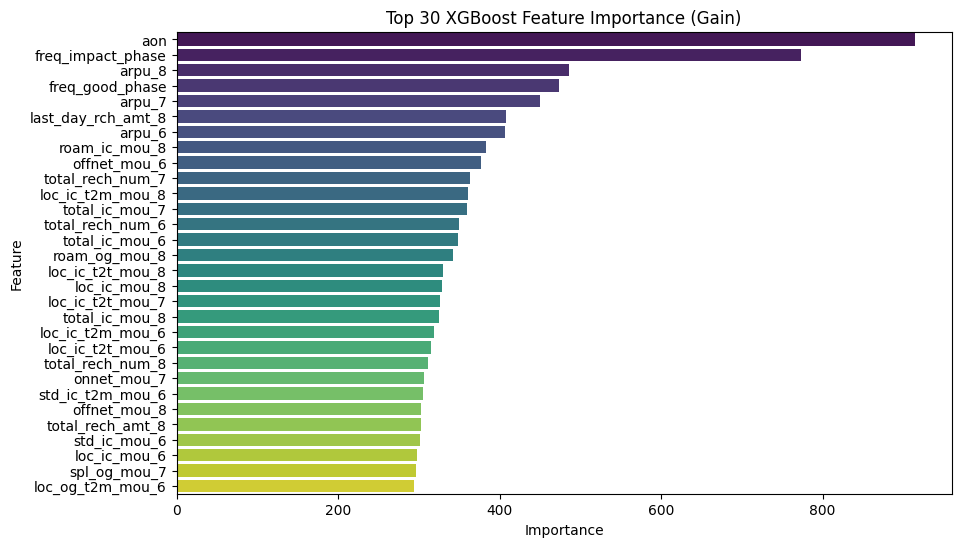

In [96]:
top_30_xgb = feature_importance_xgb.head(30)

# Plot top 30 feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_30_xgb, palette='viridis')
plt.title('Top 30 XGBoost Feature Importance (Gain)')
plt.show()

In [97]:
churn_probability = XGB_best_model.predict(test_data)
submission_df = pd.DataFrame({'id':id,
            'churn_probability': churn_probability})

In [98]:
submission_df

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0
...,...,...
29995,99994,0
29996,99995,0
29997,99996,0
29998,99997,0


In [99]:
submission_df.to_csv('submission.csv', index=False)

In [100]:
model = GradientBoostingClassifier(
    subsample=0.9,
    n_estimators=300,
    min_samples_split=5,  # Equivalent to min_child_weight in XGBoost
    max_depth=9,
    learning_rate=0.05,
    min_samples_leaf=5,   # Closest equivalent to gamma in Gradient Boosting  
)

# Train the model
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=9, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=300,
                           subsample=0.9)

In [ ]:
model = GradientBoostingClassifier()

# Define basic parameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],    # Number of trees
    'max_depth': [3, 5, 7, 10],            # Maximum tree depth
    'learning_rate': [0.1, 0.05, 0.01], # Learning rate
    'subsample': [0.8, 1.0],            # Fraction of samples used per tree
    'min_samples_split': [2, 5, 10],    # Minimum samples required to split
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


In [ ]:
GB_best_model = grid_search.best_estimator_
pred_train = GB_best_model.predict(X_train)
pred_test = GB_best_model.predict(X_test)

# Evaluate on train set
print(f"\nTrain Metrics for final_model:")
evaluate_model(y_train, pred_train, GB_best_model)

# Evaluate on test set
print(f"\nTest Metrics for final_model:")
evaluate_model(y_test, pred_test, GB_best_model)

In [ ]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [ ]:
# Evaluate on train set
print(f"\nTrain Metrics for final_model:")
evaluate_model(y_train, pred_train, model)

# Evaluate on test set
print(f"\nTest Metrics for final_model:")
evaluate_model(y_test, pred_test, model)